# Análisis de Datos de Contenido Audiovisual

En este notebook, vamos a realizar la limpieza de datos y generar algunos gráficos para analizar un DataFrame (df) que contiene una combinación de contenido audiovisual. El objetivo de este análisis es preparar los datos para crear un sistema de recomendación utilizando Streamlit.

A través de este proceso, exploraremos la estructura de los datos, identificaremos y corregiremos problemas de calidad, y visualizaremos algunas características clave que serán fundamentales para el desarrollo del recomendador.

## Contenido

1. Importación de bibliotecas necesarias
2. Carga de datos
4. Limpieza de datos
5. Análisis y visualización


## Importación de Bibliotecas

A continuación, importamos las bibliotecas necesarias para el análisis y la visualización de datos:

- **pandas**: Se utiliza para la manipulación y análisis de datos, facilitando la creación y gestión de estructuras de datos como DataFrames.
- **numpy**: Proporciona soporte para arreglos y funciones matemáticas, esenciales para realizar cálculos numéricos.
- **matplotlib.pyplot**: Permite crear gráficos y visualizaciones a partir de datos.
- **seaborn**: Basada en Matplotlib, esta biblioteca mejora las visualizaciones estadísticas, haciéndolas más atractivas y fáciles de interpretar.
- **WordCloud**: Utilizada para generar nubes de palabras a partir de un conjunto de texto, útil para visualizar frecuencias de palabras.
- **LinearSegmentedColormap**: Permite crear mapas de colores personalizados para mejorar las visualizaciones en gráficos.
- **warnings**: Se utiliza para manejar advertencias en el código, lo que nos permite suprimir mensajes que no son relevantes para nuestro análisis.

Desactivamos las advertencias para mantener la salida del notebook más limpia.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings("ignore")

from functions import *

## Carga de Datos

A continuación, llamamos a la función `load_data()` para cargar los datos de los archivos CSV correspondientes a diferentes géneros de contenido audiovisual. Esta función se encarga de leer múltiples archivos CSV y concatenarlos en un solo DataFrame.


In [2]:
df = load_data()

## Limpieza de Datos

En esta sección, se realizan varias operaciones de limpieza en el conjunto de datos para garantizar que esté en un formato adecuado para el análisis. A continuación, se detallan las principales acciones que se llevan a cabo:

1. **Eliminación de Columnas**:
   - Se eliminan las columnas **`Runtime`**, **`Certificate`**, y **`Gross Revenue`** del DataFrame mediante la función `drop()`.

     - **`Runtime`**: Esta variable indica la duración de la serie o película, la cual no es relevante para nuestro análisis.
     - **`Certificate`**: Representa la clasificación de edad del contenido, que no será utilizada en el contexto del análisis actual.
     - **`Gross Revenue`**: Refleja los ingresos brutos, una variable que no se considera necesaria para el modelo de recomendación.

2. **Limpieza de Datos**:
   - A continuación, se aplicará la función `clean_data()` para eliminar filas con datos faltantes (NaN), duplicados y valores no válidos en la columna **`Number of Votes`**.

     - **Eliminación de NaN**: Se eliminan todas las filas que contienen valores nulos, asegurando la integridad de los datos.
     - **Eliminación de Duplicados**: Se eliminan filas duplicadas para evitar que datos idénticos se cuenten más de una vez.
     - **Conversión de Tipo y Validación**: La columna **`Number of Votes`** se convierte a un tipo numérico. Se eliminan las filas que contienen valores no numéricos en esta columna, lo que es esencial para el análisis posterior.




In [3]:
df = drop_columns(df)
df = clean_data(df)

## Filtrando Películas Únicas

En esta sección, se lleva a cabo la filtración del conjunto de datos para asegurarnos de que solo se incluyan películas únicas, ordenadas por el número de votos. Esta acción es fundamental para la preparación de datos antes del análisis. A continuación, se detallan las principales operaciones realizadas:

1. **Ordenamiento del DataFrame**:
   - Se ordena el DataFrame por la columna **`Number of Votes`** en orden descendente.
   
     - **`Number of Votes`**: Al ordenar por esta columna, se priorizan las películas que han recibido más interacción, lo que puede ser útil para el modelo de recomendación.

2. **Eliminación de Duplicados**:
   - Se utiliza la función `drop_duplicates()` para eliminar películas duplicadas basadas en los identificadores **`Title`** e **`IMDb ID`**.

     - **`Title`**: Representa el título de la película o serie, y es crucial mantener solo una instancia de cada título.
     - **`IMDb ID`**: Este identificador único proporciona un método adicional para asegurar que no se repitan títulos, lo que podría llevar a sesgos en el análisis.

     - **Mantenimiento de la Primera Ocurrencia**: Al usar el parámetro `keep='first'`, se asegura que se conserve la primera aparición de cada título único en el DataFrame.

La función `unique_films()` es esencial para preparar el conjunto de datos, garantizando que cada película se considere solo una vez en el análisis. 


In [4]:
df = unique_films(df)

## Adición de Nuevas Columnas

En esta etapa, se añaden nuevas columnas al DataFrame que son esenciales para enriquecer el conjunto de datos y facilitar el análisis posterior. A continuación, se describen las principales operaciones realizadas:

1. **Creación de la Columna `embedding`**:
   - Se añade una nueva columna denominada **`embedding`**, que se crea concatenando las columnas **`Title`** y **`Synopsis`**.
   
     - **`Title`**: Representa el título de la película o serie.
     - **`Synopsis`**: Proporciona un resumen de la trama. La concatenación de estas dos columnas permitirá obtener una representación combinada que es útil para análisis de texto y para la creación de un modelo de recomendación basado en contenido.

2. **Creación de la Columna `Main Genre`**:
   - Se añade una nueva columna llamada **`Main Genre`**, que se genera extrayendo el primer género de la columna **`Genre`**.
   
     - **`Genre`**: Contiene múltiples géneros separados por comas. La extracción del primer género permite clasificar cada película de manera más sencilla, facilitando así la segmentación de datos para análisis posteriores.

Con estas nuevas columnas, se mejora la capacidad del modelo para identificar similitudes entre títulos basados en su sinopsis y género.


In [5]:
df = new_columns(df)

## Clasificación de Géneros en Categorías de Estado de Ánimo

En esta etapa del análisis, se asigna una categoría de estado de ánimo a cada película o serie en función de su género principal. Esta clasificación es útil para crear un sistema de recomendación más intuitivo y atractivo visualmente. A continuación, se describen las operaciones realizadas:

1. **Asignación de la Columna `Mood`**:
   - Se crea una nueva columna llamada **`Mood`** en el DataFrame, utilizando la función `apply()` para aplicar la función `classify_mood()` a cada valor en la columna **`Main Genre`**.
   
     - **`Main Genre`**: Contiene el género principal de cada película, y a partir de este género se determinará el estado de ánimo correspondiente.

### Función `classify_mood`

La función `classify_mood(genre)` clasifica los géneros en categorías de estado de ánimo según los siguientes criterios:


- **Clasificaciones de Estado de Ánimo**:
  - **`😂 Fun 😂`**: Para géneros que generalmente se consideran divertidos, como comedia, animación, familia, fantasía, musical, música y reality-TV.
  - **`🥰 Romantic 🥰`**: Para el género romántico.
  - **`😢 Sad 😢`**: Para géneros que se asocian con emociones tristes, como drama, documental y biografía.
  - **`🤠 Adventurous 🤠`**: Para géneros considerados aventureros, como aventura, ciencia ficción, acción, guerra y western.
  - **`🫣 Tense 🫣`**: Para géneros que generan tensión, como thriller, crimen, misterio y horror.
  - **`🤪 Mixed 🤪`**: Para cualquier otro género no mencionado.

- **Acciones dentro de la Función**:
  - Se convierte el género a minúsculas para asegurar una comparación consistente.
  - Se evalúan las condiciones para clasificar el género en una de las categorías de estado de ánimo previamente definidas.

El uso de emojis en las categorías no solo añade un toque visual atractivo, sino que también facilita la comprensión y la interacción con el sistema de recomendación en Streamlit. Esta clasificación contribuirá a mejorar la experiencia del usuario al navegar por el contenido audiovisual.


In [6]:
df['Mood'] = df['Main Genre'].apply(classify_mood)

## Exportación del DataFrame y Visualización de Resultados

En esta etapa final del análisis, se llevan a cabo dos operaciones clave para preparar el conjunto de datos limpio y procesado para su uso en la aplicación Streamlit. Estas operaciones aseguran que el DataFrame esté disponible y se pueda revisar fácilmente. A continuación, se detallan las acciones realizadas:

1. **Exportación a CSV**:
   - Se utiliza la función `to_csv()` para guardar el DataFrame en un archivo CSV.
   
     - **Propósito**: La exportación del DataFrame es esencial ya que permite que todos los cambios realizados durante la limpieza y transformación de datos se conserven. Este archivo CSV será utilizado posteriormente en Streamlit para implementar el sistema de recomendaciones, garantizando que la información disponible sea la más actualizada y limpia.




In [7]:
df = to_csv(df)

2. **Visualización de las Primeras Filas**:
    - Se emplea el método head(5) para mostrar las primeras cinco filas del DataFrame procesado.

        - **Propósito**: Esta operación permite realizar una revisión rápida de cómo ha quedado el DataFrame después de todas las operaciones de limpieza y transformación. Al observar las primeras filas, se puede verificar que las nuevas columnas se han añadido correctamente y que la información es la esperada, lo que ayuda a garantizar que los datos están listos para el análisis posterior.

In [9]:
df.head(5)

,Title,IMDb ID,Release Year,Genre,Cast,Synopsis,Rating,Number of Votes,embedding,Main Genre,Mood
95,The Shawshank Redemption,tt0111161,1994,Drama,"Director:, Frank Darabont, | , Stars:, Tim...","Over the course of several years, two convicts...",9.3,2748497,The Shawshank Redemption Over the course of se...,Drama,😢 Sad 😢
84,The Dark Knight,tt0468569,2008,"Action, Crime, Drama","Director:, Christopher Nolan, | , Stars:, ...",When the menace known as the Joker wreaks havo...,9.0,2721301,The Dark Knight When the menace known as the J...,Action,🤠 Adventurous 🤠
38,Inception,tt1375666,2010,"Action, Adventure, Sci-Fi","Director:, Christopher Nolan, | , Stars:, ...",A thief who steals corporate secrets through t...,8.8,2415500,Inception A thief who steals corporate secrets...,Action,🤠 Adventurous 🤠
253,Fight Club,tt0137523,1999,Drama,"Director:, David Fincher, | , Stars:, Brad...",An insomniac office worker and a devil-may-car...,8.8,2188692,Fight Club An insomniac office worker and a de...,Drama,😢 Sad 😢
9604,Game of Thrones,tt0944947,2011–2019,"Action, Adventure, Drama","Stars:, Emilia Clarke, , Peter Dinklage, , Kit...",Nine noble families fight for control over the...,9.2,2166823,Game of Thrones Nine noble families fight for ...,Action,🤠 Adventurous 🤠


## Generación de la Nube de Palabras

En este bloque de código, se llama a la función `generate_word_cloud(df)` para crear una visualización en forma de nube de palabras que representa los géneros principales del DataFrame. Esta nube de palabras permite observar de manera visual la frecuencia de cada género, facilitando la identificación de los más comunes en el conjunto de datos.

### Descripción de la Nube de Palabras:
- **Géneros Representados**:
  - **Drama**: La palabra más grande en la nube es **`Drama`**, indicando que este género es el más frecuente en el conjunto de datos, lo que sugiere que hay un número significativo de películas y series clasificadas en esta categoría.
  - **Comedy**: La siguiente palabra más prominente es **`Comedy`**, lo que refleja también un fuerte interés y cantidad de contenido en este género.
  - **Documentary**: **`Documentary`** aparece también de manera destacada, lo que indica que hay una cantidad considerable de títulos en esta categoría.

Además de estos géneros, otros como **`Action`**, **`Adventure`** y **`Crime`** también se presentan, aunque en menor tamaño, sugiriendo una diversidad de contenido que podría ser explorada en recomendaciones.

Esta visualización es útil no solo para proporcionar una visión rápida de la distribución de los géneros, sino también para entender mejor los tipos de contenido que predominan en el conjunto de datos, lo que puede influir en el diseño de un sistema de recomendación más efectivo. La nube de palabras contribuye a hacer la información más accesible y atractiva visualmente.

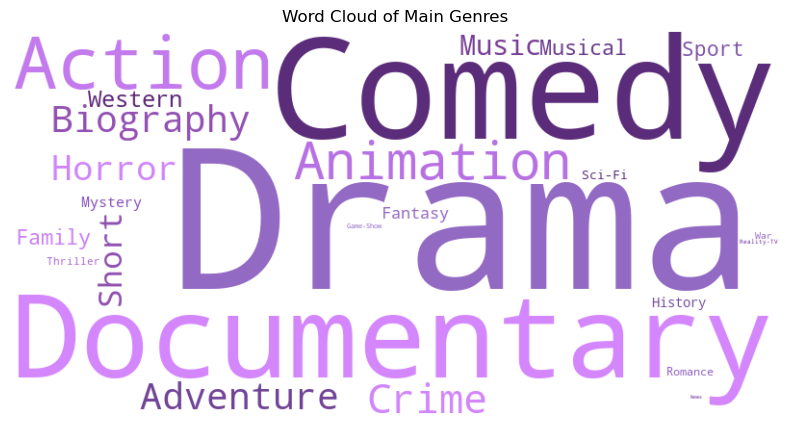

In [10]:
generate_word_cloud(df)

## Visualización de la Distribución de Géneros Principales

En este bloque de código, se llama a la función `plot_main_genre_distribution(df)` para crear un gráfico de barras que muestra la distribución de los géneros principales en el DataFrame. Esta visualización permite entender la popularidad y la cantidad de contenido disponible en cada uno de los géneros clasificados.

### Descripción del Gráfico:
- **Géneros Predominantes**:
  - **Drama**: El género **`Drama`** es el más representado en el conjunto de datos, con una cantidad notable de títulos, lo que sugiere un fuerte interés en este tipo de contenido.
  - **Comedy**: A continuación, **`Comedy`** también muestra una buena cantidad de contenido, reflejando su popularidad entre los espectadores.
  - **Documentary**: Otro género destacado es **`Documentary`**, que, aunque no tan abundante como los anteriores, todavía tiene una presencia considerable.

- **Géneros Menos Representados**:
  - Géneros como **`Romance`** y **`Thriller`** muestran resultados más bajos en comparación con los géneros predominantes, lo que podría indicar un menor número de títulos disponibles o un menor interés del público en estos géneros específicos.
  - En la parte inferior de la distribución, encontramos géneros como **`Reality-TV`**, **`News`**, y **`Film-Noir`**, que presentan las cifras más bajas, lo que sugiere que hay menos contenido producido en estas categorías.



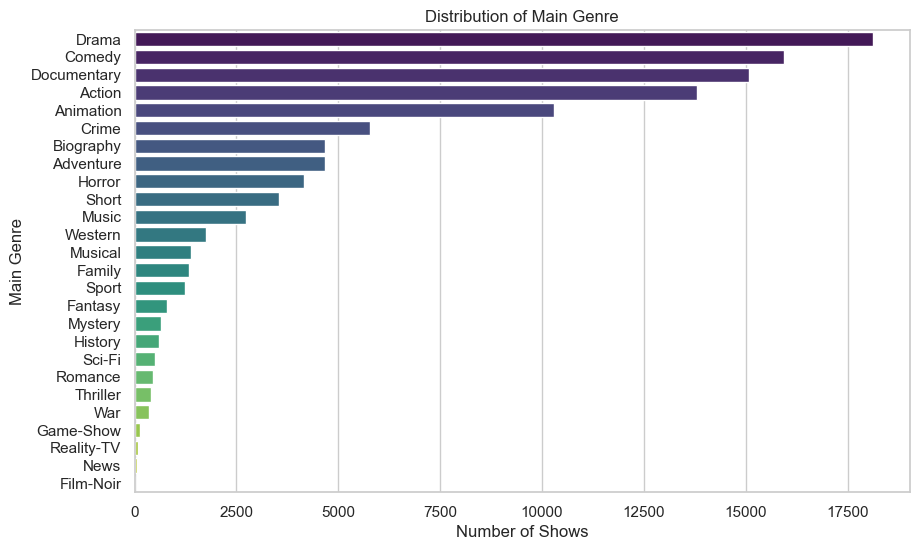

In [12]:
plot_main_genre_distribution(df)

## Visualización de la Distribución de Calificaciones

En este bloque de código, se llama a la función `plot_ratings_distribution(df)` para crear un histograma que muestra la distribución de las calificaciones en el DataFrame. Esta visualización permite analizar cómo se distribuyen las calificaciones de las películas y series en el conjunto de datos.

### Descripción del Gráfico:
- **Distribución de Calificaciones**:
  - La mayoría de las calificaciones se encuentran entre **6** y **8**, lo que indica que la mayoría del contenido tiene una recepción positiva entre los espectadores.
  - La distribución se aproxima a una **distribución normal**, con un sesgo ligero hacia la derecha. Esto sugiere que, aunque hay una cantidad considerable de calificaciones más altas, también hay algunas calificaciones bajas que afectan la simetría del gráfico.



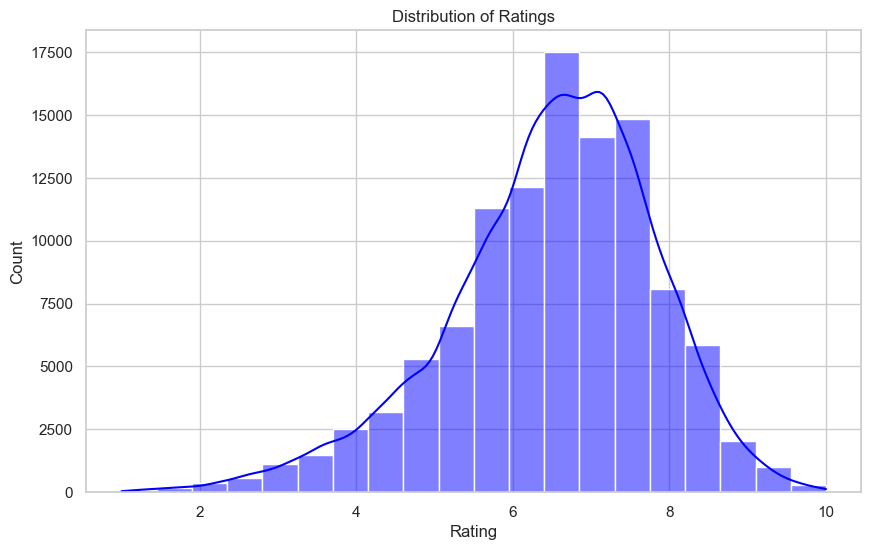

In [13]:
plot_ratings_distribution(df)

## Visualización de la Relación entre Calificaciones y Número de Votos

En este bloque de código, se llama a la función `plot_ratings_vs_votes(df)` para crear un diagrama de dispersión que muestra la relación entre las calificaciones y el número de votos de cada película o serie en el DataFrame. Esta visualización permite explorar cómo estas dos variables se correlacionan y qué géneros predominan en diferentes rangos de calificación.

### Descripción del Gráfico:
- **Puntos Pequeños en la Zona Baja**:
  - La parte inferior del gráfico presenta muchos puntos pequeños, lo que indica que hay una gran cantidad de películas y series con un bajo número de votos y calificaciones moderadas.
  
- **Tendencia Ascendente**:
  - A medida que se avanza por el eje **x**, los puntos tienden a aumentar en tamaño y número, sugiriendo que las películas y series que reciben calificaciones más altas tienden a acumular un mayor número de votos. Esto es un indicativo de que los contenidos mejor valorados son más populares entre los espectadores.

- **Puntos Más Grandes y Menos Numerosos**:
  - Los puntos más grandes, que representan las películas y series con una alta calificación (entre **8** y **10**) y un alto número de votos, son menos numerosos. Esto sugiere que, aunque hay algunas obras excepcionales que reciben tanto altas calificaciones como una considerable cantidad de votos, estas son relativamente pocas en comparación con el total de contenidos analizados.

- **Características del Gráfico**:
  - **Tamaño de los Puntos**: El tamaño de los puntos en el gráfico está determinado por el número de votos, lo que permite visualizar la popularidad relativa de cada contenido.
  - **Colores**: Los colores de los puntos están determinados por el género principal, facilitando la identificación de qué tipos de contenido predominan en los diferentes rangos de calificación.




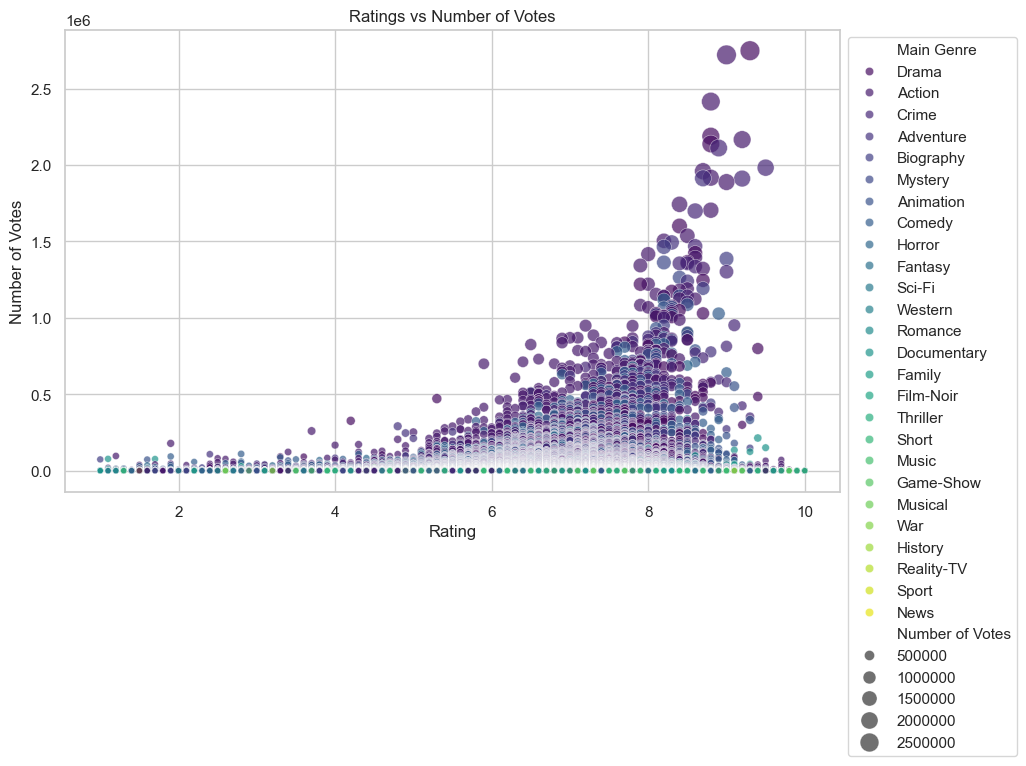

In [14]:
plot_ratings_vs_votes(df)

## Visualización de las Calificaciones Promedio por Género

En este bloque de código, se llama a la función `plot_average_ratings_by_genre(df)` para crear un gráfico de barras horizontales que muestra las calificaciones promedio de cada género principal en el DataFrame. Esta visualización es útil para comparar cómo se desempeñan diferentes géneros en términos de calificaciones, proporcionando una perspectiva clara sobre la calidad percibida de cada tipo de contenido.

### Descripción del Gráfico:
- **Géneros con Calificaciones Más Altas**:
  - El género **documentary** lidera el gráfico con la calificación promedio más alta, seguido de **sport** y **history**. Estos resultados indican que, en promedio, las producciones en estos géneros son bien recibidas por la audiencia.

- **Géneros con Calificaciones Más Bajas**:
  - En la parte inferior de la lista se encuentran géneros como **thriller**, **sci-fi** y **horror**, que presentan calificaciones promedio más bajas. Esto sugiere que, aunque estos géneros pueden tener una gran base de seguidores, la calidad percibida varía y podría no ser tan alta en comparación con otros géneros.

- **Rango de Calificaciones**:
  - Las calificaciones más altas oscilan entre **6** y **8**, lo que indica una recepción generalmente positiva, mientras que las más bajas se encuentran entre **4** y **6**. Este rango sugiere que, aunque hay géneros que destacan, la mayoría de los contenidos se sitúan en un nivel medio de apreciación.

- **Características del Gráfico**:
  - **Estilo de Gráfico**: Se utiliza un gráfico de barras horizontales, que facilita la comparación entre géneros al permitir que las etiquetas sean legibles y claras.
  - **Límites del Eje X**: Se establece un límite en el eje x de **0 a 10**, lo que permite una visualización estandarizada de las calificaciones, en línea con el sistema de calificación más comúnmente utilizado.




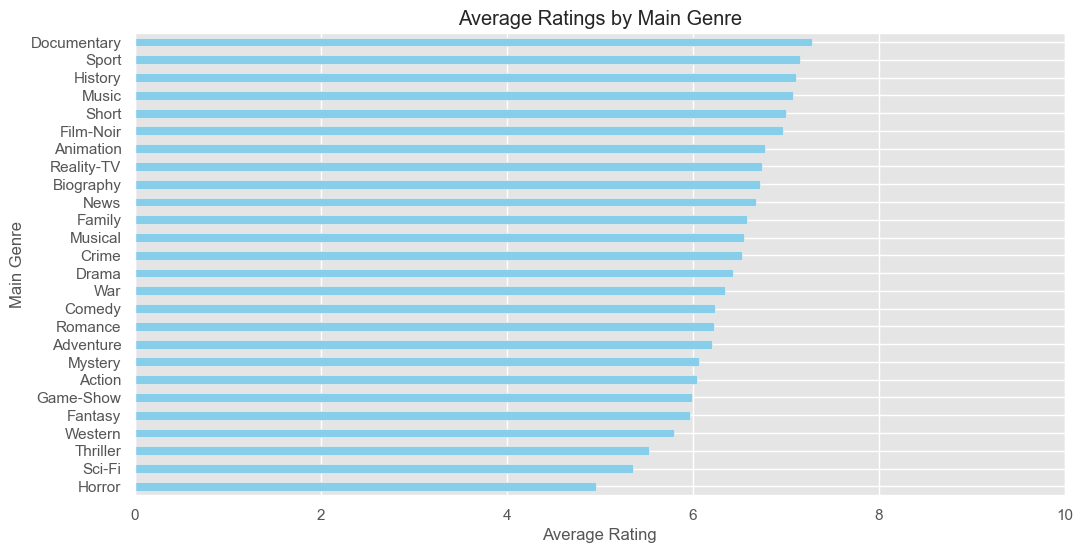

In [15]:
plot_average_ratings_by_genre(df)

## Visualización de los 10 Títulos con Más Votos

En este bloque de código, se llama a la función `plot_top_10_votes(df)` para crear un gráfico de barras que muestra los diez títulos de películas o series con el mayor número de votos en el DataFrame. Esta visualización permite identificar cuáles son las producciones más populares entre los espectadores, lo que puede ser un indicador de calidad y atractivo general.

### Descripción del Gráfico:
- **Títulos Más Votados**:
  - El gráfico revela que **"The Shawshank Redemption"** se sitúa en la primera posición, destacándose como la película con más votos. Esto sugiere una fuerte apreciación y popularidad entre los espectadores.
  - En segundo lugar, **"The Dark Knight"** sigue de cerca, lo que refuerza su estatus como uno de los favoritos del público.

- **Otras Producciones Destacadas**:
  - A continuación, se presentan varios títulos icónicos como **"Inception"** y **"Fight Club"**, entre otros. Estos nombres son reconocidos en el ámbito cinematográfico y reflejan la tendencia del público hacia producciones de gran calidad y notoriedad.



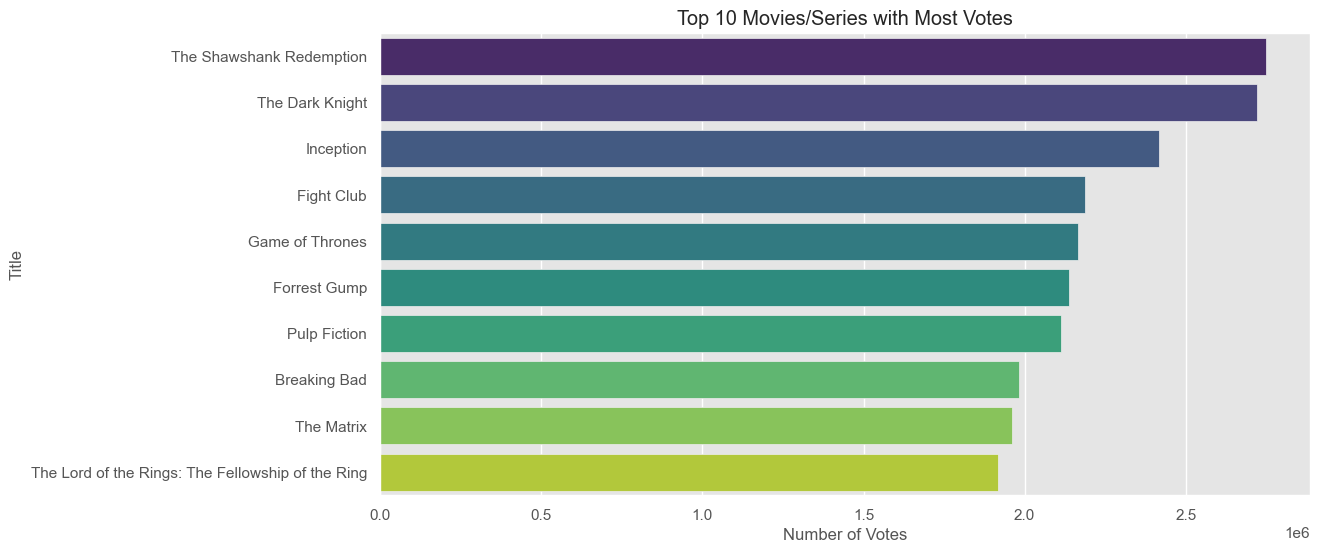

In [16]:
plot_top_10_votes(df)
